In [1]:
from tabulate import tabulate
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import sys
sys.path.append('/content/drive/My Drive/collaborative-filtering-recommender/src')
from recommender import MovieRecommenderUserBased, MovieRecommenderItemBased
from evaluation import create_train_test, rmse, precision_recall

In [2]:
data = pd.read_csv("/content/drive/My Drive/collaborative-filtering-recommender/data/data.csv")
user_movie_ratings = data.pivot_table(index='user_id', columns='movie_title', values='rating')
user_movie_ratings.fillna(0, inplace=True)

In [3]:
similarity = cosine_similarity(user_movie_ratings)

similarity_df = pd.DataFrame(similarity, index=user_movie_ratings.index, columns=user_movie_ratings.index)

In [4]:
movie_similarity = cosine_similarity(user_movie_ratings.T)
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_ratings.columns, columns=user_movie_ratings.columns)

In [5]:
user_based_recommender = MovieRecommenderUserBased(user_movie_ratings, similarity_df)
item_based_recommender = MovieRecommenderItemBased(user_movie_ratings, movie_similarity_df)

In [6]:
train_matrix, full_test_data = create_train_test(user_movie_ratings)
test_data = full_test_data[:500]

user_sim = cosine_similarity(train_matrix)
user_sim_df = pd.DataFrame(user_sim, index=train_matrix.index, columns=train_matrix.index)
user_recommender = MovieRecommenderUserBased(train_matrix, user_sim_df)

item_sim = cosine_similarity(train_matrix.T)
item_sim_df = pd.DataFrame(item_sim, index=train_matrix.columns, columns=train_matrix.columns)
item_recommender = MovieRecommenderItemBased(train_matrix, item_sim_df)

In [7]:
from tabulate import tabulate
results = []

for name, recommender in [
    ("User-Based", user_recommender),
    ("Item-Based", item_recommender)
]:
    r = rmse(recommender, test_data)
    p, rc = precision_recall(recommender, test_data, k=5)
    results.append([name, round(r, 4), round(p, 4), round(rc, 4)])


headers = ["Method", "RMSE", "Precision", "Recall"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

╒════════════╤════════╤═════════════╤══════════╕
│ Method     │   RMSE │   Precision │   Recall │
╞════════════╪════════╪═════════════╪══════════╡
│ User-Based │ 1.5666 │      0.375  │    0.06  │
├────────────┼────────┼─────────────┼──────────┤
│ Item-Based │ 1.6593 │      0.4125 │    0.066 │
╘════════════╧════════╧═════════════╧══════════╛


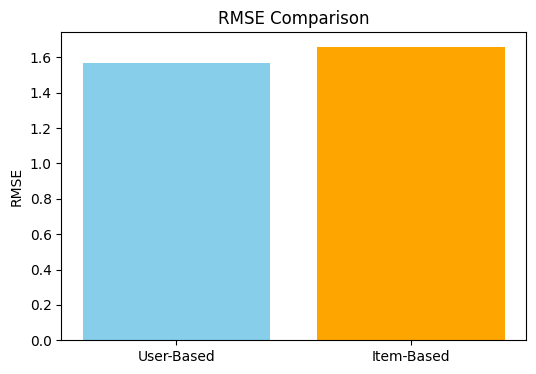

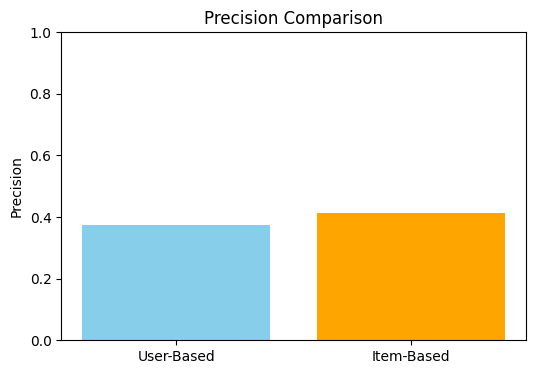

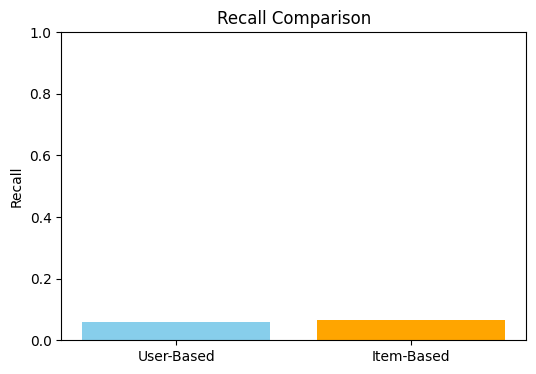

In [8]:
df = pd.DataFrame(results, columns=["Method", "RMSE", "Precision", "Recall"])

import matplotlib.pyplot as plt

metrics = ["RMSE", "Precision", "Recall"]

for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.bar(df["Method"], df[metric], color=["skyblue", "orange"])
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    if "Precision" in metric or "Recall" in metric:
        plt.ylim(0, 1)
    plt.show()


In [58]:
import json

metrics_dict = df.set_index("Method").to_dict(orient="index")

output_path = "/content/drive/MyDrive/collaborative-filtering-recommender/results/evaluation_metrics.json"
with open(output_path, "w") as f:
    json.dump(metrics_dict, f, indent=4)

In [59]:
user_id = 1

user_rec = user_recommender.recommend(user_id, top_n=5)
item_rec = item_recommender.recommend(user_id, top_n=5)

recommendations_df = pd.DataFrame({
    "Recommender": ["User-Based", "Item-Based"],
    "User ID": [user_id, user_id],
    "Top-5 Recommendations": [user_rec, item_rec]
})

output_path = "/content/drive/MyDrive/collaborative-filtering-recommender/results/top_n_recommendations.csv"
recommendations_df.to_csv(output_path, index=False)

In [60]:
!pip install numpy==1.26.4



In [61]:
from surprise import Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

data = Dataset.load_builtin('/content/drive/My Drive/collaborative-filtering-recommender/data/data.csv')

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)

rmse = accuracy.rmse(predictions)
rmse


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).